# Objective

To introduce the components of machine learning problems

## Preliminaries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Learning Problems


## When?

 - There is a pattern (or, at least you feel so)
 - The pattern cannot be represented by a mathematical formula
 - There is lot of data


In supervised learning, we are concerned with learning the relationship between a target $y$ and the inputs $X$. There are two broad classes of problems - regression (when $y$ is numeric) and classification (when $y$ is categorical).

### Examples

Is machine learning a good solution for the following problems?


**a. Classification**

Is a number divisible by 2?

In [ ]:
#@title Data

x = np.random.choice(range(10000000), 
                     size=10000, 
                     replace=False)

numbers_df = pd.DataFrame({'x': x})
numbers_df['y'] = (numbers_df.x % 2)


In [ ]:
numbers_df.sample(15)

,x,y
3938,1533911,1
3367,4096607,1
3439,1670182,0
1188,8427980,0
5147,1146887,1
4805,5026815,1
63,5668512,0
7120,6080129,1
8553,27551,1
3592,4178658,0


In [ ]:
numbers_df.shape

(10000, 2)

**b. Regression**

A stone is thrown horizontally from a cliff of height $h$ with speed $v$. Predict how far the stone will travel till it hits the ground.

In [ ]:
#@title Data
n_samples = 10000
v = np.random.normal(loc=12, scale=3, size=n_samples)
h = np.random.normal(loc=25, scale=5, size=n_samples)

t = np.sqrt(2*h/9.8)

y = v * t

distances_df = pd.DataFrame({'v': v,
                             'h': h,
                             'y': y})

In [ ]:
distances_df.shape

(10000, 3)

In [ ]:
distances_df.sample(10)

,v,h,y
9693,10.261113,24.311085,22.855915
3340,10.795880,25.371808,24.566071
8451,11.449598,14.371685,19.608575
7340,3.651368,30.143766,9.056415
2470,13.408007,27.902903,31.995646
3400,10.527205,17.845424,20.089932
1087,14.488702,23.422538,31.677319
1424,8.502419,29.734438,20.944709
2271,15.164070,31.289666,38.319356
9440,13.545248,30.231784,33.645021


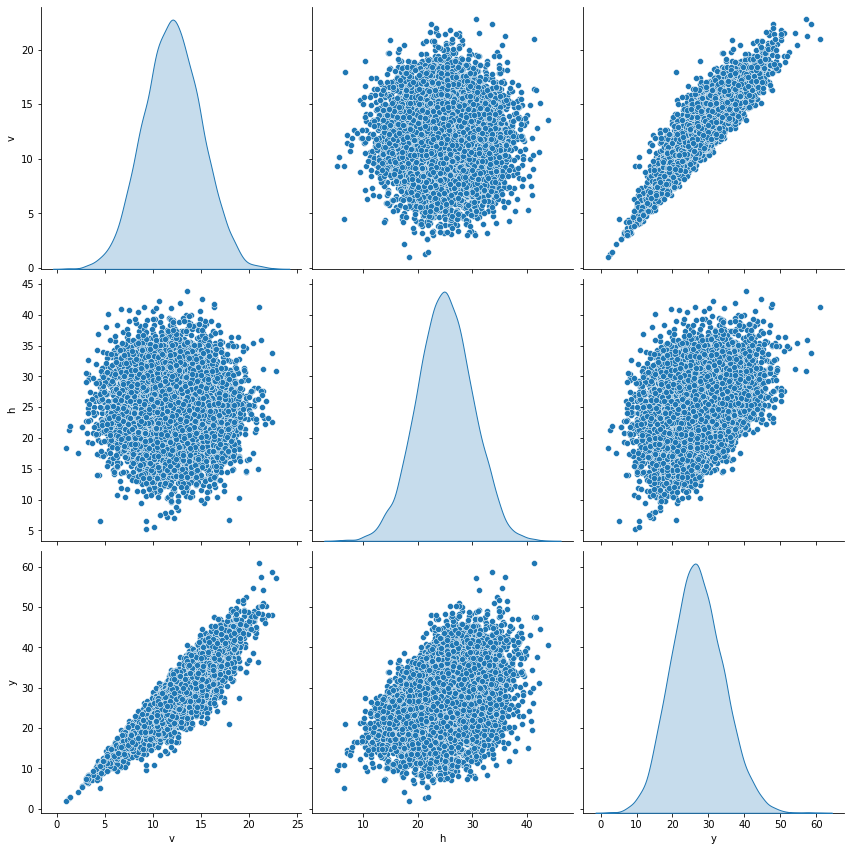

In [ ]:
sns.pairplot(distances_df, diag_kind='kde', 
             height=4)

## Components

 - Unknown target: $f$ (deterministic) or $\mathbb{P}(y|X)$ (noisy)
 - Examples or Dataset, $\{(\mathbf{x_1}, y_1), \ldots, (\mathbf{x_N}, y_N)\}$
 - Learning algorithms


Let us identify these components in the following machine learning example:

### Example: **Radhe**

As a part of the Zee5 Data Science team, you are evaluating how many of your subscribers will like the movie *Radhe*.

 - *Unknown Target*: We do not know how many of our subscribers would like Radhe, that is, $f$ is unknown and noisy
 - *Examples*: For a set of customers who have seen Radhe, we have a record of their preferences (watching history). This could be data on genre of films they like, actor preferences, ... (can you think of more interesting *features*?). Note that we also know features of those who have not seen Radhe yet
 - *Algorithms*: Well, there is no shortage



Given a set of inputs $\mathbf{x}$ (customer information), we want to approximate the unknown target function $f: \mathbf{X} \rightarrow \mathbf{Y}$, where $\mathbf{X}$ is the input space (set of all possible inputs $\mathbf{x}$) and $\mathbf{Y}$ is the output space (set of all corresponding outputs $y \in \{\text{'likes Radhe'}, \text{'does not like Radhe'}\}$) 

From all possible formulas $h_1, h_2, h_3, \ldots, h_M$ linking $\mathbf{X}$ to $\mathbf{Y}$ (called *algorithms*), we wish to 'pick the best learner' $h$ that is a faithful approximation of $f$.

The best $h$:
 - faithfully replicates $f$ in the sample (i.e., makes few in-sample mistakes, $E_{\text{training}}$)
 - faithfully replicates $f$ out of the sample (i.e., makes few out-of-sample mistakes, $E_{out}$)

From a learning perspective, the only thing that matters is whether $E_{out} \approx 0$ or not.

To re-emphasize, $f$ is unknown and the best $h$ has recourse only to the training examples to achieve low $E_{\text{training}}$ and low $E_{out}$.

A clever way to estimate $E_{out}$ is to extract a test set from the training data **before** we estimate a learner.

Formally, **after a good model $h$ is found**, the Hoeffding's inequality ensures that:

$$
\mathbb{P}(|E_{out} - E_{\text{test}}|> \epsilon) \leq 2e^{-2\epsilon^2N}
$$

So, by evaluating a model on a test set of size $N$, we guarantee that 'performance of the model in production $=$ performance we observe on the test set'. The larger the test set, the stronger our guarantee.

This is also the reason why we evaluate a model on the test set **only once**. Changing the model after evaluating $E_{out}$ will invalidate the application of this inequality.

The examples in the dataset need to be picked independently for us to guarantee $E_{\text{test}} \approx E_{out}$.

We still have to figure out how to make $E_{\text{training}}$ as small as possible.

# Summary

Machine learning can be summarized as:

$$P(y, X) = P(y|X) P(X)$$

$P(y, X)$ is the observed data, our only hope of minimizing $E_{\text{training}}$.

$P(y|X)$ is the unknown target, however complex.

$P(X)$ is the data distribution, but is unknown.

Despite this, Hoeffding ensures that learning is feasible.
